[[149813.17]]
[[3895.96022548]]
[[1730.45598442]]


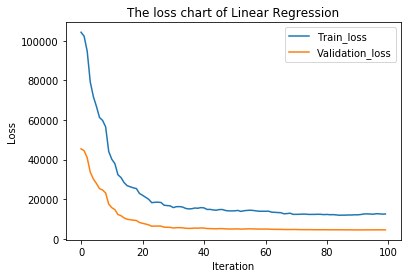

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# 定义损失函数
def function_loss(w, X, y):
    loss = 0.5 * (y.T.dot(y) - 2 * w.T.dot(X.T).dot(y) + w.T.dot(X.T).dot(X).dot(w))
    return loss

# 定义闭式解
def close_form_solution(w, X_train, y_train, X_val, y_val):
    new_w = (X_train.T.dot(X_train)).I.dot(X_train.T).dot(y_train)
    new_w = new_w.reshape(w.shape[0], 1)  # 更新参数w
    loss_train = function_loss(new_w, X_train, y_train)
    loss_val = function_loss(new_w, X_val, y_val)
    print(loss_train)  # 输出训练集的损失值
    print(loss_val)  # 输出测试集的损失值

# 随机梯度下降
def SGD(w, X, y):
    dw = np.dot(X.T, (X.dot(w) - y))
    return dw

# 线性回归
def linear_regression(w, X_train, y_train, X_val, y_val):
    iterations = 100  # 迭代次数
    alpha = 0.01  # 学习率
    loss_train_his = []
    loss_val_his = []
    for i in range(iterations):
        index = random.randint(0, X_train.shape[0] -1)
        X0 = X_train[index]
        y0 = y_train[index]
        loss_train = function_loss(w, X_train, y_train)
        loss_val = function_loss(w, X_val, y_val)
        loss_train_his.append(loss_train[0, 0])
        loss_val_his.append(loss_val[0, 0])
        w = w - alpha * SGD(w, X0, y0)

    plot(iterations, loss_train_his, loss_val_his)

# 画出损失函数的图像
def plot(iterations,loss_train, loss_val):
    plt.plot(np.arange(iterations), loss_train, label='Train_loss')
    plt.plot(np.arange(iterations), loss_val, label='Validation_loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('The loss chart of Linear Regression')
    plt.legend(loc='best')
    plt.show()

if __name__ == '__main__':
    # 读取实验数据
    X, y = load_svmlight_file("G:\datasets\housing_scale.txt")
    X = X.todense()
    # 添加w0对应的x0方便矩阵化计算
    X = np.column_stack((X, np.ones(X.shape[0])))
    y = y.reshape((y.size, 1))

    # 数据集划分训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.33, random_state=42)

    # 线性模型参数全0初始化
    w = np.zeros(X.shape[1])
    w = w.reshape(w.shape[0], 1)

    loss = function_loss(w, X, y)
    
    #输出损失函数
    print(loss)

    close_form_solution(w, X_train, y_train, X_val, y_val)

    linear_regression(w, X_train, y_train, X_val, y_val)
